In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_csv("export_comptes.csv", sep=';')
data.head()

,date_comptabilisation,libellé_complet_operation,montant_operation,devise,Unnamed: 4
0,24/04/2024,CARTE X5090 23/04 SM CASINO CS164,-46.96,EUR,NaN
1,24/04/2024,CARTE X8837 23/04 LA VIE CLAIRE,-15.22,EUR,NaN
2,22/04/2024,CARTE X5090 19/04 LA VIE CLAIRE,-6.53,EUR,NaN
3,22/04/2024,CARTE X5090 21/04 BROLANGERIE,-6.59,EUR,NaN
4,22/04/2024,CARTE X5090 19/04 SM CASINO CS164,-14.13,EUR,NaN


In [3]:
data.drop(columns='Unnamed: 4', inplace=True)
data.head()

,date_comptabilisation,libellé_complet_operation,montant_operation,devise
0,24/04/2024,CARTE X5090 23/04 SM CASINO CS164,-46.96,EUR
1,24/04/2024,CARTE X8837 23/04 LA VIE CLAIRE,-15.22,EUR
2,22/04/2024,CARTE X5090 19/04 LA VIE CLAIRE,-6.53,EUR
3,22/04/2024,CARTE X5090 21/04 BROLANGERIE,-6.59,EUR
4,22/04/2024,CARTE X5090 19/04 SM CASINO CS164,-14.13,EUR


In [4]:
data['libellé_complet_operation'].value_counts()

libellé_complet_operation
JAZZ JEUNE ACTIF -20%                                                                                                                               6
CARTE X5090 03/04 SM CASINO CS164                                                                                                                   2
CARTE X5090 26/10 AU VIEUX CAMPEUR                                                                                                                  2
CARTE X8837 01/04 SEMITAG                                                                                                                           2
PRELEVEMENT EUROPEEN 6528527269 DE: GAZ ET ELECTRICITE DE GRENOBLE ID: FR37ZZZ002933 MOTIF: GEG gaz EC3011202313980 REF: EC3011202313980            1
                                                                                                                                                   ..
VIR RECU    6492725159S DE: CAF ISERE MOTIF: 2116375XDURHONE     022024ME 

In [5]:
data['libelle_simplifié'] = data['libellé_complet_operation']
data['catégorie'] = data['libelle_simplifié']
data.head()

,date_comptabilisation,libellé_complet_operation,montant_operation,devise,libelle_simplifié,catégorie
0,24/04/2024,CARTE X5090 23/04 SM CASINO CS164,-46.96,EUR,CARTE X5090 23/04 SM CASINO CS164,CARTE X5090 23/04 SM CASINO CS164
1,24/04/2024,CARTE X8837 23/04 LA VIE CLAIRE,-15.22,EUR,CARTE X8837 23/04 LA VIE CLAIRE,CARTE X8837 23/04 LA VIE CLAIRE
2,22/04/2024,CARTE X5090 19/04 LA VIE CLAIRE,-6.53,EUR,CARTE X5090 19/04 LA VIE CLAIRE,CARTE X5090 19/04 LA VIE CLAIRE
3,22/04/2024,CARTE X5090 21/04 BROLANGERIE,-6.59,EUR,CARTE X5090 21/04 BROLANGERIE,CARTE X5090 21/04 BROLANGERIE
4,22/04/2024,CARTE X5090 19/04 SM CASINO CS164,-14.13,EUR,CARTE X5090 19/04 SM CASINO CS164,CARTE X5090 19/04 SM CASINO CS164


In [6]:
for index in data.index:
    str = data.loc[index, 'libelle_simplifié']
    if str.find('LA VIE CLAIRE') != -1:
        data.loc[index, 'libelle_simplifié'] = 'LA VIE CLAIRE'
        data.loc[index, 'catégorie'] = 'ALIMENTAIRE'
    elif str.find('CASINO') != -1:
        data.loc[index, 'libelle_simplifié'] = 'CASINO'
        data.loc[index, 'catégorie'] = 'ALIMENTAIRE'
    elif str.find('NETFLIX') != -1:
        data.loc[index, 'libelle_simplifié'] = 'NETFLIX'
        data.loc[index, 'catégorie'] = 'FOYER'
    elif str.find('LECLERC') != -1:
        data.loc[index, 'libelle_simplifié'] = 'LECLERC'
        data.loc[index, 'catégorie'] = 'ALIMENTAIRE'
    elif str.find('PICARD') != -1:
        data.loc[index, 'libelle_simplifié'] = 'PICARD'
        data.loc[index, 'catégorie'] = 'ALIMENTAIRE'
    elif (str.find('JAZZ JEUNE ACTIF') != -1) | (str.find('COTIS') != -1) | (str.find('INTERETS') != -1):
        data.loc[index, 'libelle_simplifié'] = 'BANQUE'
        data.loc[index, 'catégorie'] = 'BANQUE'
    elif str.find("Prelevement Avis d'echeance") != -1:
        data.loc[index, 'libelle_simplifié'] = 'LOYER'
        data.loc[index, 'catégorie'] = 'FOYER'
    elif str.find('Tipeee') != -1:
        data.loc[index, 'libelle_simplifié'] = 'Tipeee'
        data.loc[index, 'catégorie'] = 'REVENU'
    elif str.find('CAF ISERE') != -1:
        data.loc[index, 'libelle_simplifié'] = 'CAF'
        data.loc[index, 'catégorie'] = "RENTREE D'ARGENT"
    elif str.find('GAZ ET ELECTRICITE') != -1:
        data.loc[index, 'libelle_simplifié'] = 'GAZ ET ELECTRICITE'
        data.loc[index, 'catégorie'] = 'FOYER'
    elif (str.find('TACOS') != -1) | (str.find('AU BOEUF CHAROLAIS') != -1) | (str.find('O CALLAGHAN') != -1) | (str.find('OASIS') != -1):
        data.loc[index, 'libelle_simplifié'] = 'RESTAURANT'
        data.loc[index, 'catégorie'] = 'LOISIR'
    elif str.find('KALIWEAR') != -1:
        data.loc[index, 'libelle_simplifié'] = 'VETEMENT'
        data.loc[index, 'catégorie'] = 'FOYER'
    elif str.find('CARREFOUR') != -1:
        data.loc[index, 'libelle_simplifié'] = 'CARREFOUR'
        data.loc[index, 'catégorie'] = 'ALIMENTAIRE'
    elif (str.find('CORALIE') != -1) | (str.find('LENNY') != -1) | (str.find('Lenny') != -1):
        data.loc[index, 'libelle_simplifié'] = 'VIREMENT'
        data.loc[index, 'catégorie'] = "MOUVEMENT INTER COMPTE"
    elif (str.find('VIET HUNG') != -1) | (str.find('KING') != -1):
        data.loc[index, 'libelle_simplifié'] = 'VIET'
        data.loc[index, 'catégorie'] = 'ALIMENTAIRE'
    elif str.find('Orange') != -1:
        data.loc[index, 'libelle_simplifié'] = 'INTERNET'
        data.loc[index, 'catégorie'] = 'FOYER'
    elif str.find('SAS ENZO') != -1:
        data.loc[index, 'libelle_simplifié'] = 'SUPER U'
        data.loc[index, 'catégorie'] = 'ALIMENTAIRE'
    elif str.find('PHARMACIE') != -1:
        data.loc[index, 'libelle_simplifié'] = 'PHARMACIE'
        data.loc[index, 'catégorie'] = "SANTE"
    elif (str.find('LE LABO') != -1) | (str.find('BLOC 27') != -1):
        data.loc[index, 'libelle_simplifié'] = 'BLOC'
        data.loc[index, 'catégorie'] = 'LOISIR'
    elif (str.find('STATIONNEMENT') != -1) | (str.find('DAC ECHIROLLES DISTRIBUT') != -1) | (str.find('CHORGES') != -1) | (str.find('SEMITAG') != -1) |(str.find('APRR') != -1):
        data.loc[index, 'libelle_simplifié'] = 'TRANSPORT'
        data.loc[index, 'catégorie'] = 'TRANSPORT'
    elif (str.find('QUENTIN') != -1) | (str.find('COLINE') != -1):
        data.loc[index, 'libelle_simplifié'] = 'REMBOURSEMENT AMIS'
        data.loc[index, 'catégorie'] = "RENTREE D'ARGENT"
    elif str.find('VIEUX CAMPEUR') != -1:
        data.loc[index, 'libelle_simplifié'] = 'VIEUX CAMPEUR'
        data.loc[index, 'catégorie'] = 'LOISIR'
    elif str.find('MINIMUM FORFAITAIRE') != -1:
        data.loc[index, 'libelle_simplifié'] = 'FRAIS DECOUVERT'
        data.loc[index, 'catégorie'] = 'BANQUE'
    elif (str.find('ALPES COULEURS') != -1) | (str.find('MEDIAPART') != -1) | (str.find('HASHTAG') != -1) | (str.find('GAMING') != -1) | (str.find('AMAZON') != -1):
        data.loc[index, 'libelle_simplifié'] = 'LOISIR'
        data.loc[index, 'catégorie'] = 'LOISIR'
    elif (str.find('COSTE JEAN MARI') != -1) | (str.find('NARDI') != -1) | (str.find('BROLANGERIE') != -1):
        data.loc[index, 'libelle_simplifié'] = 'BOULANGERIE'
        data.loc[index, 'catégorie'] = 'ALIMENTAIRE'
    elif str.find('COMMERCE') != -1:
        data.loc[index, 'libelle_simplifié'] = 'AUTRE'
        data.loc[index, 'catégorie'] = 'AUTRE'
    elif str.find('CHEQUE') != -1:
        data.loc[index, 'libelle_simplifié'] = 'CADEAU'
        data.loc[index, 'catégorie'] = 'AUTRE'
    else:
        data.loc[index, 'libelle_simplifié'] = 'AUTRE'
        data.loc[index, 'catégorie'] = 'AUTRE'

    
        
    

In [7]:
print(data['libelle_simplifié'].value_counts(ascending=True))

libelle_simplifié
PHARMACIE              1
CADEAU                 1
PICARD                 1
VETEMENT               1
FRAIS DECOUVERT        1
BLOC                   2
LECLERC                3
REMBOURSEMENT AMIS     3
SUPER U                3
VIEUX CAMPEUR          3
BOULANGERIE            4
CARREFOUR              5
LOISIR                 5
NETFLIX                6
LOYER                  6
INTERNET               6
RESTAURANT             7
AUTRE                  8
CAF                    8
TRANSPORT              9
GAZ ET ELECTRICITE    12
Tipeee                12
BANQUE                12
VIET                  12
VIREMENT              20
LA VIE CLAIRE         21
CASINO                28
Name: count, dtype: int64


In [8]:
data.loc[data['libelle_simplifié'] == 'AUTRE']

,date_comptabilisation,libellé_complet_operation,montant_operation,devise,libelle_simplifié,catégorie
63,15/03/2024,CARTE X5090 14/03 Mol*Cookinglife B.V. 91.92 E...,-91.92,EUR,AUTRE,AUTRE
126,18/12/2023,CARTE X5090 13/12 STEAM PURCHASE 37.99 EUR ALL...,-37.99,EUR,AUTRE,AUTRE
131,08/12/2023,CARTE X8837 07/12 L EPICEA,-4.20,EUR,AUTRE,AUTRE
163,09/11/2023,FRAIS PAIEMENT HORS ZONE EURO CARTE X8837 06/1...,-2.13,EUR,AUTRE,AUTRE
168,08/11/2023,CARTE X8837 06/11 AMZNMktplace 36.10 GBP ROYAU...,-41.68,EUR,AUTRE,AUTRE
169,07/11/2023,FRAIS PAIEMENT HORS ZONE EURO CARTE X8837 02/1...,-1.31,EUR,AUTRE,AUTRE
174,06/11/2023,CARTE X8837 02/11 MIDJOURNEY INC. 12.00 USD ET...,-11.41,EUR,AUTRE,AUTRE
182,03/11/2023,CARTE X8837 30/10 CHAM COMMERCE ELECTRONIQUE,-149.16,EUR,AUTRE,AUTRE


In [9]:
data['montant_operation'].astype(float)

0     -46.96
1     -15.22
2      -6.53
3      -6.59
4     -14.13
       ...  
195    -9.80
196     0.01
197    50.00
198   -14.08
199   -22.62
Name: montant_operation, Length: 200, dtype: float64

In [10]:
data_par_type = data.groupby('libelle_simplifié')['montant_operation'].sum()
data_par_type

libelle_simplifié
AUTRE                 -339.80
BANQUE                -108.19
BLOC                   -38.90
BOULANGERIE            -22.84
CADEAU                 150.00
CAF                   6302.31
CARREFOUR             -197.20
CASINO                -499.75
FRAIS DECOUVERT         -7.00
GAZ ET ELECTRICITE    -690.00
INTERNET              -185.94
LA VIE CLAIRE         -307.37
LECLERC               -486.48
LOISIR                -135.72
LOYER                -4045.26
NETFLIX               -153.88
PHARMACIE               -3.50
PICARD                  -7.40
REMBOURSEMENT AMIS      23.97
RESTAURANT            -147.51
SUPER U                -12.59
TRANSPORT             -354.96
Tipeee                  49.08
VETEMENT                -6.04
VIET                  -262.85
VIEUX CAMPEUR          -21.55
VIREMENT              1585.00
Name: montant_operation, dtype: float64

In [29]:
data.sort_values('catégorie')
montant = data.groupby('catégorie')['montant_operation'].sum()
montant = montant.reset_index()
montant


,catégorie,montant_operation
0,ALIMENTAIRE,-1796.48
1,AUTRE,-189.80
2,BANQUE,-115.19
3,FOYER,-5081.12
4,LOISIR,-343.68
5,MOUVEMENT INTER COMPTE,1585.00
6,RENTREE D'ARGENT,6326.28
7,REVENU,49.08
8,SANTE,-3.50
9,TRANSPORT,-354.96


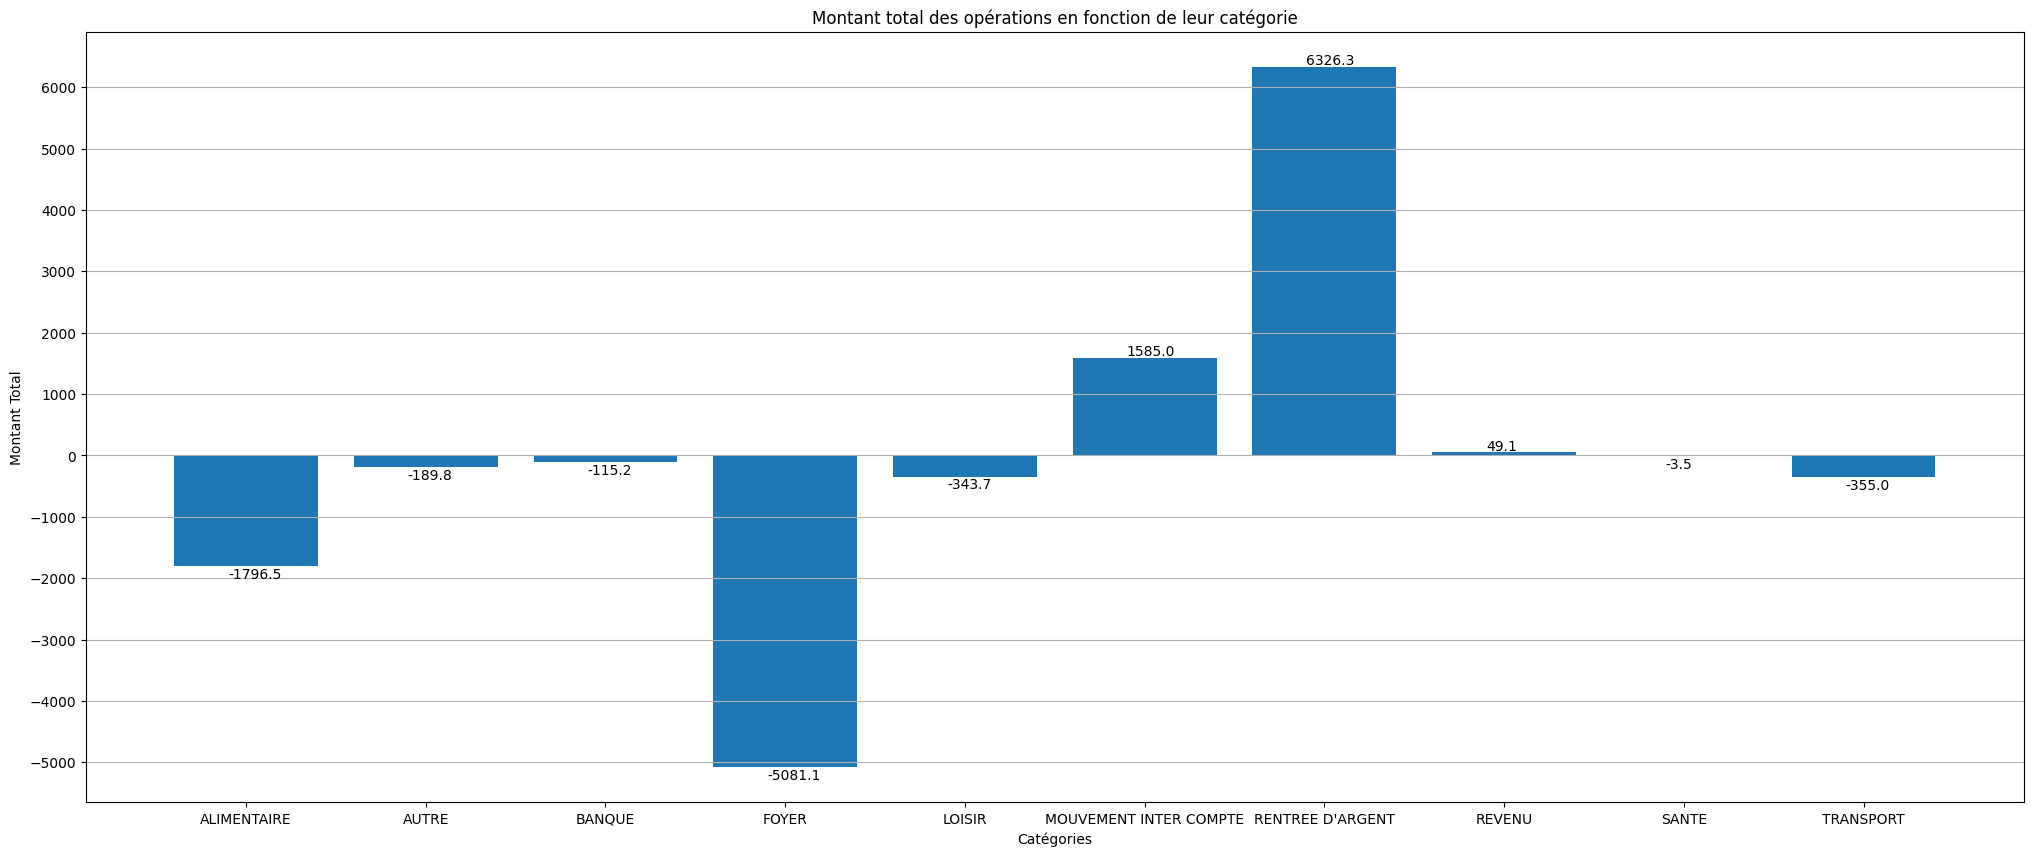

In [47]:
plt.figure(figsize=(25,10))
plt.ylabel("Montant Total")
plt.xlabel("Catégories")
plt.grid(axis='y')
plt.yticks([-5000,-4000, -3000, -2000, -1000, 0, 1000, 2000, 3000, 4000, 5000, 6000,7000])
plt.bar(x=montant["catégorie"], height=montant["montant_operation"])
plt.title("Montant total des opérations en fonction de leur catégorie")
montant_list = montant['montant_operation'].to_list()
for i in range(len(montant_list)):
    if montant_list[i] < 0:
        plt.text((i-0.1), (montant_list[i]-200), round(montant_list[i], 1))
    else:
        plt.text((i-0.1), (montant_list[i]+40), round(montant_list[i], 1))


In [76]:
data_alimentaire = data.loc[data['catégorie'] == 'ALIMENTAIRE']
# Extraction du mois de la date
data_alimentaire['mois'] = pd.to_datetime(data_alimentaire['date_comptabilisation']).dt.month

# Mappage des mois numériques pour trier correctement de octobre à avril
mois_mapping = {10: 1, 11: 2, 12: 3, 1: 4, 2: 5, 3: 6, 4: 7}

# Appliquer le mappage pour créer une nouvelle colonne de tri
data_alimentaire['mois_tri'] = data_alimentaire['mois'].map(mois_mapping)

# Trier les données selon la nouvelle colonne
data_alimentaire.sort_values('mois_tri', inplace=True)
data_alimentaire

C:\Users\Coralie\AppData\Local\Temp\ipykernel_36300\2999219398.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_alimentaire['mois'] = pd.to_datetime(data_alimentaire['date_comptabilisation']).dt.month
C:\Users\Coralie\AppData\Local\Temp\ipykernel_36300\2999219398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_alimentaire['mois'] = pd.to_datetime(data_alimentaire['date_comptabilisation']).dt.month
C:\Users\Coralie\AppData\Local\Temp\ipykernel_36300\2999219398.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,date_comptabilisation,libellé_complet_operation,montant_operation,devise,libelle_simplifié,catégorie,mois,mois_tri
199,25/10/2023,CARTE X5090 24/10 LA VIE CLAIRE,-22.62,EUR,LA VIE CLAIRE,ALIMENTAIRE,10,1
186,31/10/2023,CARTE X5090 30/10 SM CASINO CS164,-8.36,EUR,CASINO,ALIMENTAIRE,10,1
187,31/10/2023,CARTE X5090 30/10 LA VIE CLAIRE,-9.53,EUR,LA VIE CLAIRE,ALIMENTAIRE,10,1
198,25/10/2023,CARTE X5090 24/10 SM CASINO CS164,-14.08,EUR,CASINO,ALIMENTAIRE,10,1
191,30/10/2023,CARTE X5090 28/10 SM CASINO CS164,-11.38,EUR,CASINO,ALIMENTAIRE,10,1
...,...,...,...,...,...,...,...,...
27,04/04/2024,CARTE X5090 03/04 SM CASINO CS164,-8.33,EUR,CASINO,ALIMENTAIRE,4,7
28,04/04/2024,CARTE X5090 03/04 SM CASINO CS164,-21.14,EUR,CASINO,ALIMENTAIRE,4,7
33,03/04/2024,CARTE X5090 02/04 LA VIE CLAIRE,-14.99,EUR,LA VIE CLAIRE,ALIMENTAIRE,4,7
14,15/04/2024,CARTE X8837 12/04 VIET HUNG,-26.15,EUR,VIET,ALIMENTAIRE,4,7


In [85]:
# Grouper par mois et magasin
depenses_mensuelles_magasin = data_alimentaire.groupby(['mois_tri', 'libelle_simplifié'])['montant_operation'].sum().unstack().fillna(0)
print(depenses_mensuelles_magasin)
depenses_mensuelles_magasin= depenses_mensuelles_magasin.abs()

libelle_simplifié  BOULANGERIE  CARREFOUR  CASINO  LA VIE CLAIRE  LECLERC  \
mois_tri                                                                    
1                         0.00       0.00  -33.82         -38.24     0.00   
2                         0.00     -21.96   -9.35         -59.66   -40.98   
3                        -2.90      -4.54  -11.75         -30.70  -191.14   
4                         0.00     -15.36 -131.97         -10.53     0.00   
5                        -8.90    -155.34   -6.36           0.00     0.00   
6                        -4.45       0.00 -152.36         -93.76     0.00   
7                        -6.59       0.00 -154.14         -74.48  -254.36   

libelle_simplifié  PICARD  SUPER U   VIET  
mois_tri                                   
1                     0.0     0.00   0.00  
2                     0.0     0.00 -42.00  
3                     0.0    -0.61 -55.79  
4                     0.0    -2.42 -52.30  
5                     0.0     0.00 -17.40 

In [80]:
depenses_mensuelles_magasin.columns

Index(['BOULANGERIE', 'CARREFOUR', 'CASINO', 'LA VIE CLAIRE', 'LECLERC',
       'PICARD', 'SUPER U', 'VIET'],
      dtype='object', name='libelle_simplifié')

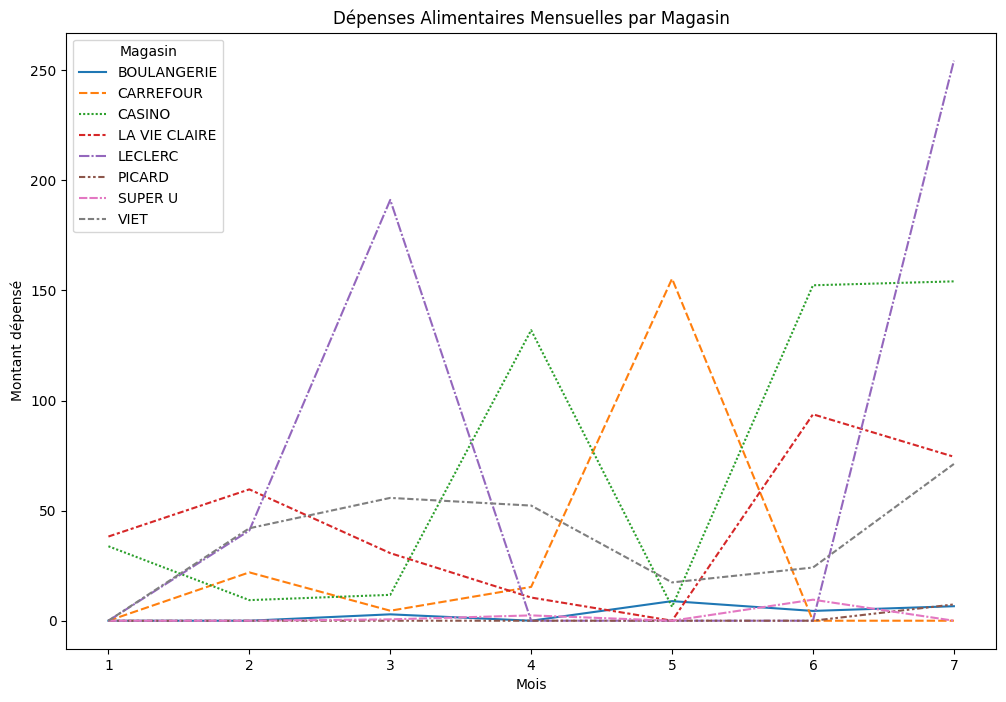

In [86]:
# Visualisation
plt.figure(figsize=(12, 8))
sns.lineplot(data=depenses_mensuelles_magasin)
plt.title('Dépenses Alimentaires Mensuelles par Magasin')
plt.xlabel('Mois')
plt.ylabel('Montant dépensé')
plt.legend(title='Magasin')
plt.show()

In [88]:
depenses_mensuelles_magasin['Ville'] = depenses_mensuelles_magasin['CASINO'] + depenses_mensuelles_magasin['LA VIE CLAIRE'] + depenses_mensuelles_magasin['SUPER U']
depenses_mensuelles_magasin['Grande surface'] = depenses_mensuelles_magasin['CARREFOUR'] + depenses_mensuelles_magasin['LECLERC']
depenses_mensuelles_magasin['Total'] = depenses_mensuelles_magasin['Ville'] + depenses_mensuelles_magasin['Grande surface']
data_visu = depenses_mensuelles_magasin[['Ville', 'Grande surface', 'Total']]
data_visu

libelle_simplifié,Ville,Grande surface,Total
mois_tri,,,
1,72.06,0.00,72.06
2,69.01,62.94,131.95
3,43.06,195.68,238.74
4,144.92,15.36,160.28
5,6.36,155.34,161.70
6,255.68,0.00,255.68
7,228.62,254.36,482.98


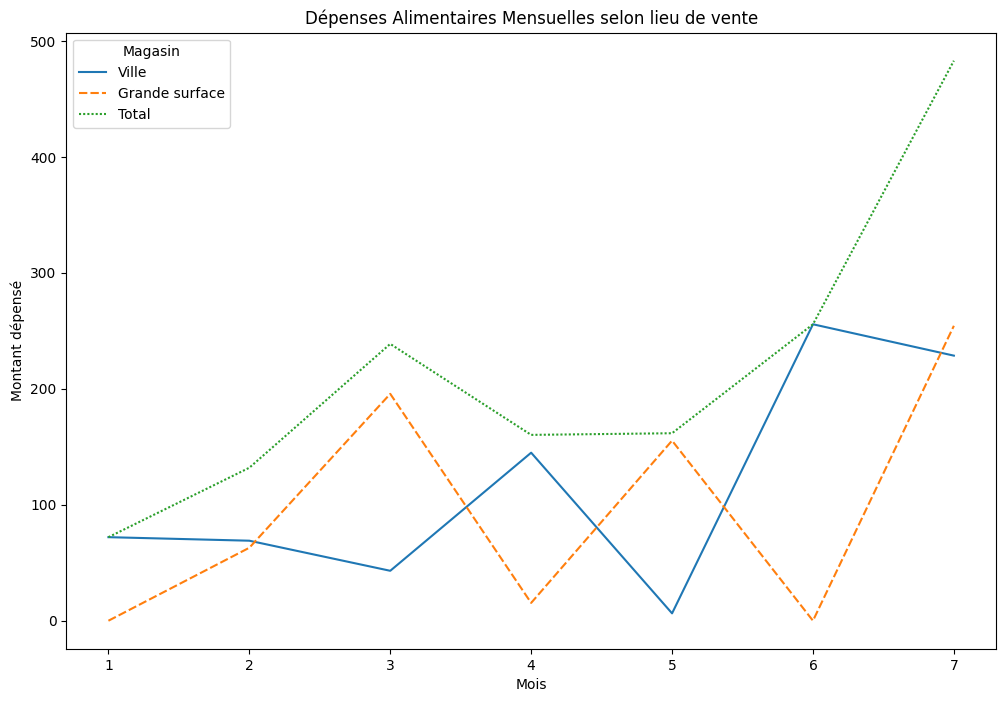

In [89]:
# Visualisation
plt.figure(figsize=(12, 8))
sns.lineplot(data=data_visu)
plt.title('Dépenses Alimentaires Mensuelles selon lieu de vente')
plt.xlabel('Mois')
plt.ylabel('Montant dépensé')
plt.legend(title='Magasin')
plt.show()

In [54]:
data_alimentaire_somme = data_alimentaire.groupby('libelle_simplifié')['montant_operation'].sum()
data_alimentaire_somme = data_alimentaire_somme.reset_index()
data_alimentaire_somme

,libelle_simplifié,montant_operation
0,BOULANGERIE,-22.84
1,CARREFOUR,-197.20
2,CASINO,-499.75
3,LA VIE CLAIRE,-307.37
4,LECLERC,-486.48
5,PICARD,-7.40
6,SUPER U,-12.59
7,VIET,-262.85


<Axes: xlabel='date_comptabilisation', ylabel='montant_operation'>

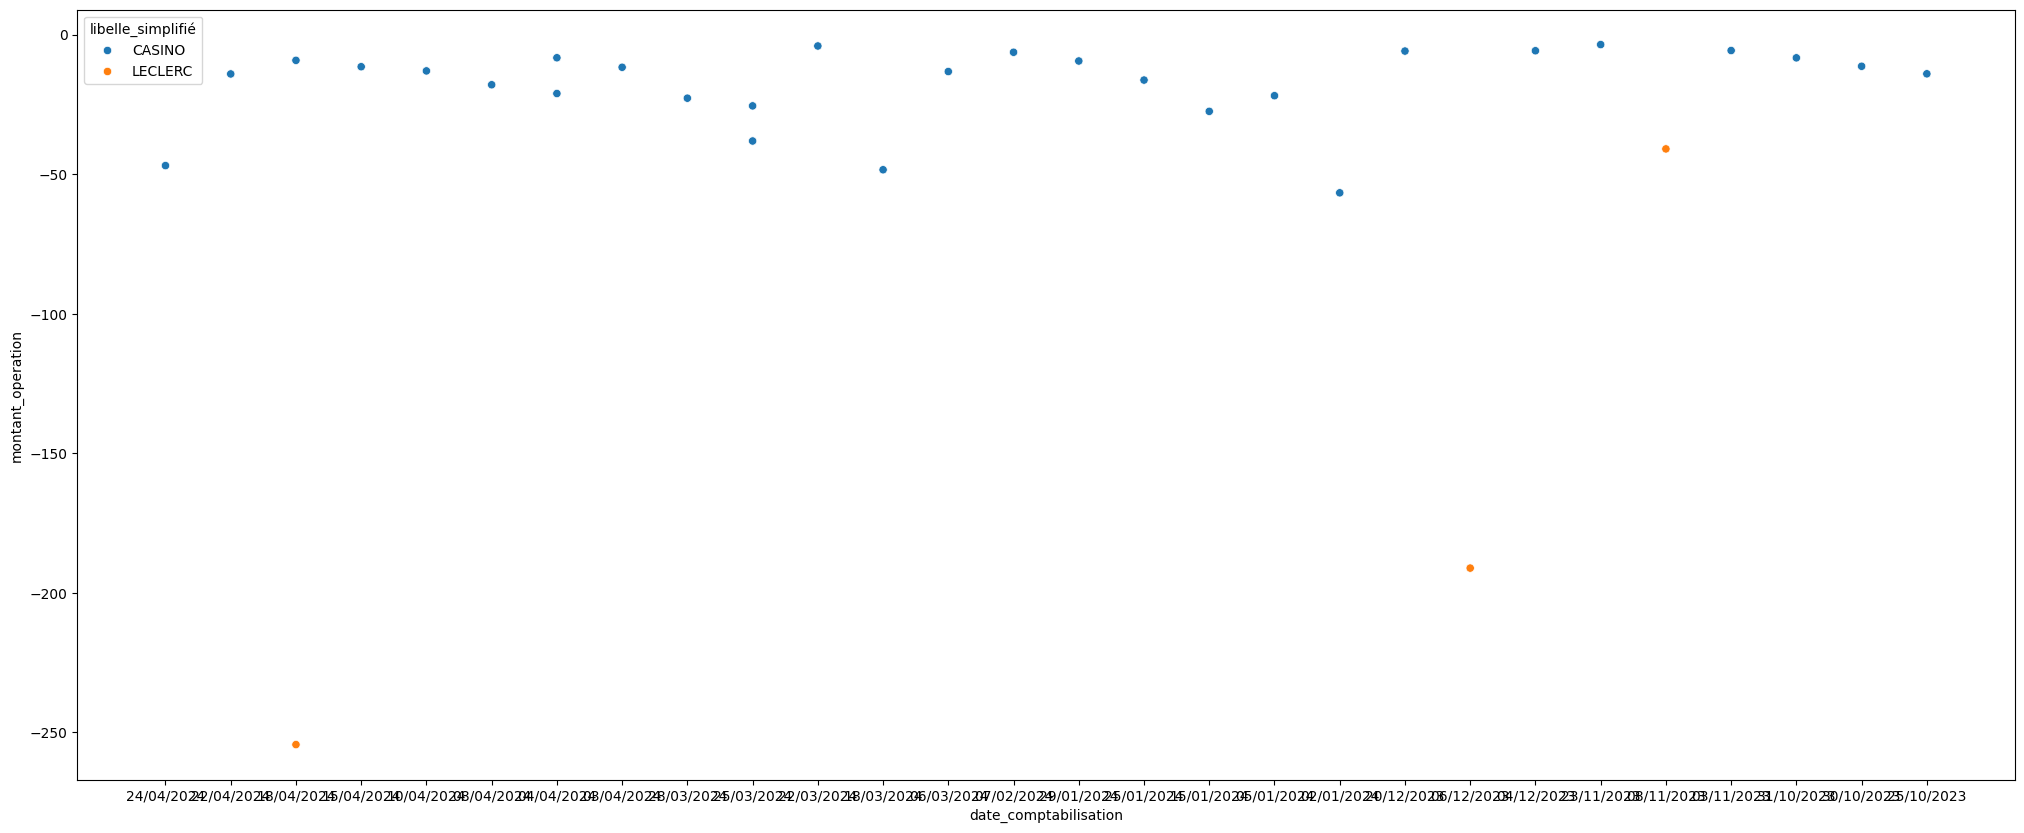

In [59]:
plt.figure(figsize=(25,10))

data_alimentaire = data.loc[(data['libelle_simplifié'] == 'LECLERC') | (data['libelle_simplifié'] == 'CASINO')]
sns.scatterplot(data=data_alimentaire, x='date_comptabilisation', y='montant_operation', hue='libelle_simplifié')

In [60]:
data.columns

Index(['date_comptabilisation', 'libellé_complet_operation',
       'montant_operation', 'devise', 'libelle_simplifié', 'catégorie'],
      dtype='object')